## Import Module

In [1]:
#import necassary module
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import string

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix,roc_curve,auc,roc_auc_score

# Cleaning the file

In [2]:
#read file 
data = pd.read_csv(r"D:\Data Science\Projects\My Projects\Project 8\FinalBalancedDataset.csv")

In [3]:
data

,Unnamed: 0,Toxicity,tweet
0,0,0,@user when a father is dysfunctional and is s...
1,1,0,@user @user thanks for #lyft credit i can't us...
2,2,0,bihday your majesty
3,3,0,#model i love u take with u all the time in ...
4,4,0,factsguide: society now #motivation
...,...,...,...
56740,56740,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
56741,56741,1,"you've gone and broke the wrong heart baby, an..."
56742,56742,1,young buck wanna eat!!.. dat nigguh like I ain...
56743,56743,1,youu got wild bitches tellin you lies


In [4]:
data.drop(columns = 'Unnamed: 0',inplace=True)

In [5]:
data

,Toxicity,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation
...,...,...
56740,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
56741,1,"you've gone and broke the wrong heart baby, an..."
56742,1,young buck wanna eat!!.. dat nigguh like I ain...
56743,1,youu got wild bitches tellin you lies


In [6]:
stopwords = set(stopwords.words('english'))

def filter_text(texts):
    clean_texts= []
    lemmatizer = WordNetLemmatizer()
    stemmer = PorterStemmer()

    for text in texts:
        text = text.lower()
        tokens = word_tokenize(text)
        cleaned_tokens = []

        for word in tokens:
            if word.isalnum() and word not in stopwords:
                word = word.strip(string.punctuation)
                word = lemmatizer.lemmatize(word)
                word = stemmer.stem(word)
                cleaned_tokens.append(word)

        cleaned_text = ' '.join(cleaned_tokens)
        clean_texts.append(cleaned_text)

    return clean_texts

In [7]:
data['clean_tweet'] = filter_text(data['tweet'])
data

,Toxicity,tweet,clean_tweet
0,0,@user when a father is dysfunctional and is s...,user father dysfunct selfish drag kid dysfunct...
1,0,@user @user thanks for #lyft credit i can't us...,user user thank lyft credit ca use caus offer ...
2,0,bihday your majesty,bihday majesti
3,0,#model i love u take with u all the time in ...,model love u take u time
4,0,factsguide: society now #motivation,factsguid societi motiv
...,...,...,...
56740,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,muthaf lie 8220 lifeask right tl trash 8230 mi...
56741,1,"you've gone and broke the wrong heart baby, an...",gone broke wrong heart babi drove redneck crazi
56742,1,young buck wanna eat!!.. dat nigguh like I ain...,young buck wan na eat dat nigguh like aint fuc...
56743,1,youu got wild bitches tellin you lies,youu got wild bitch tellin lie


## Bag of Word Model score

DecisionTreeClassifier Model:


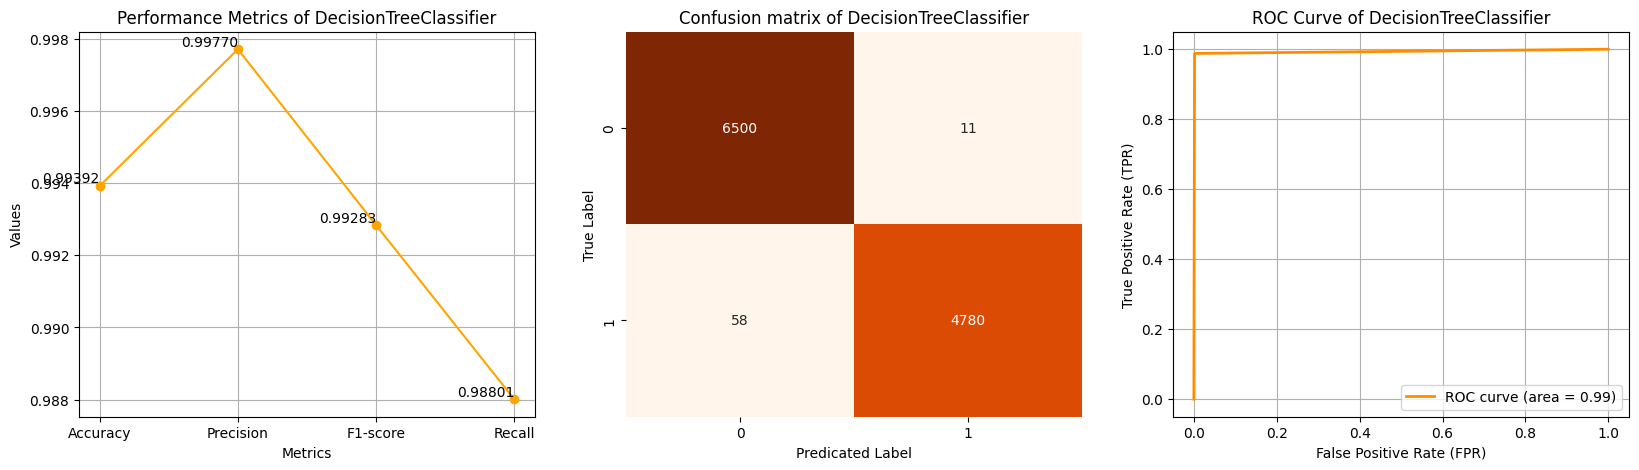

RandomForestClassifier Model:


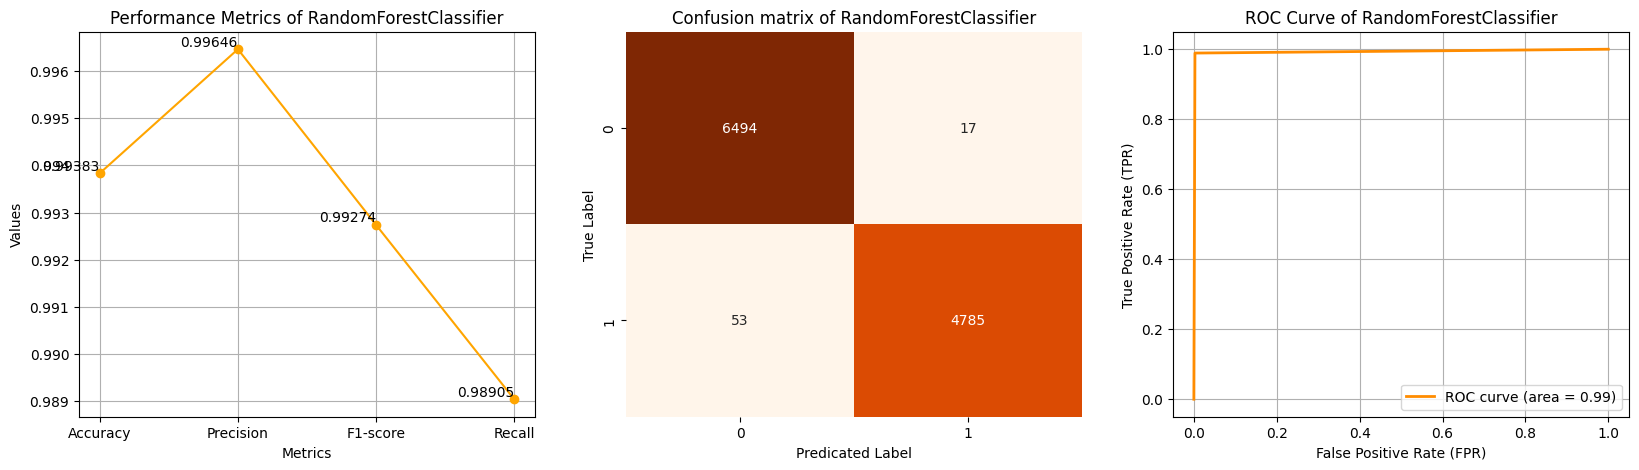

MultinomialNB Model:


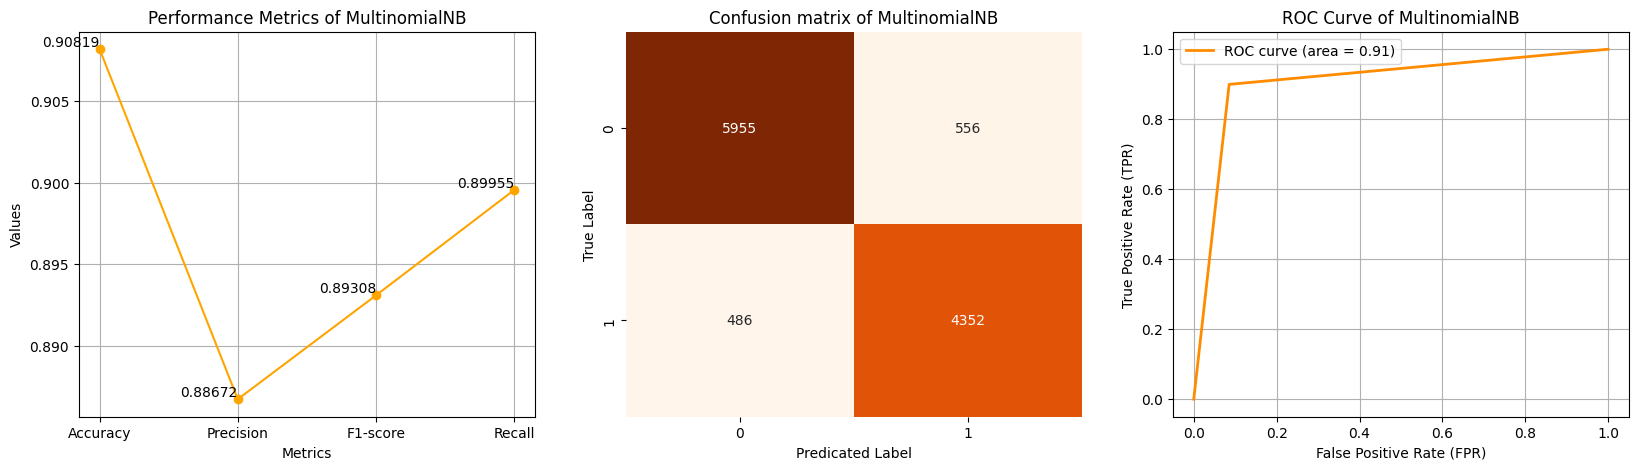

KNeighborsClassifier Model:


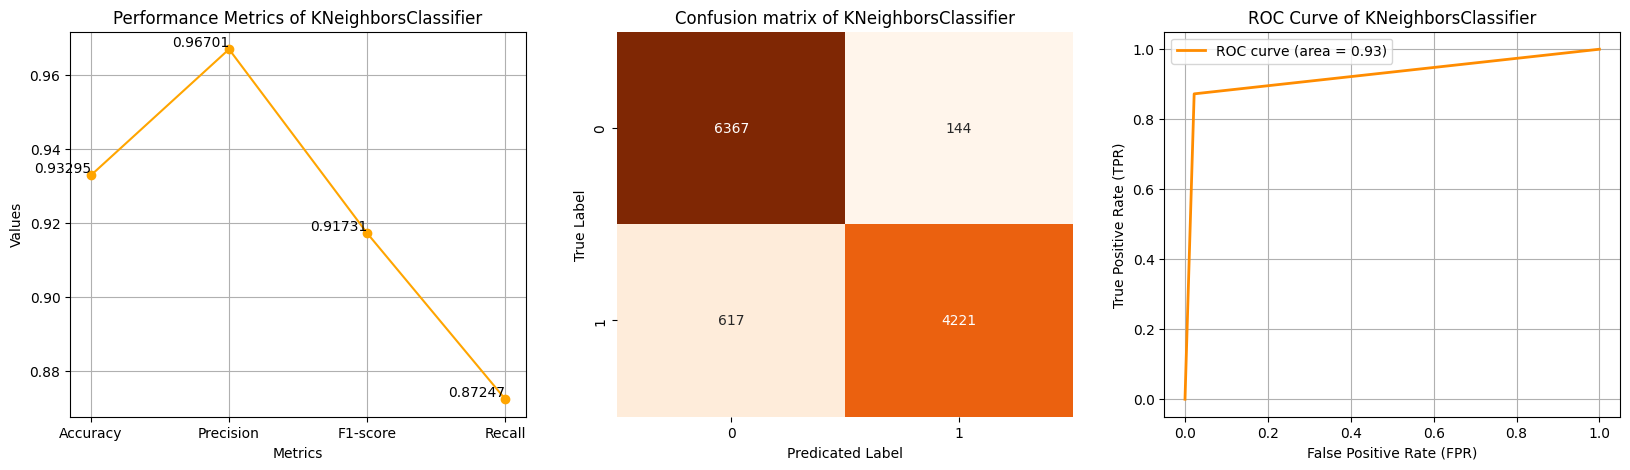

SVC Model:


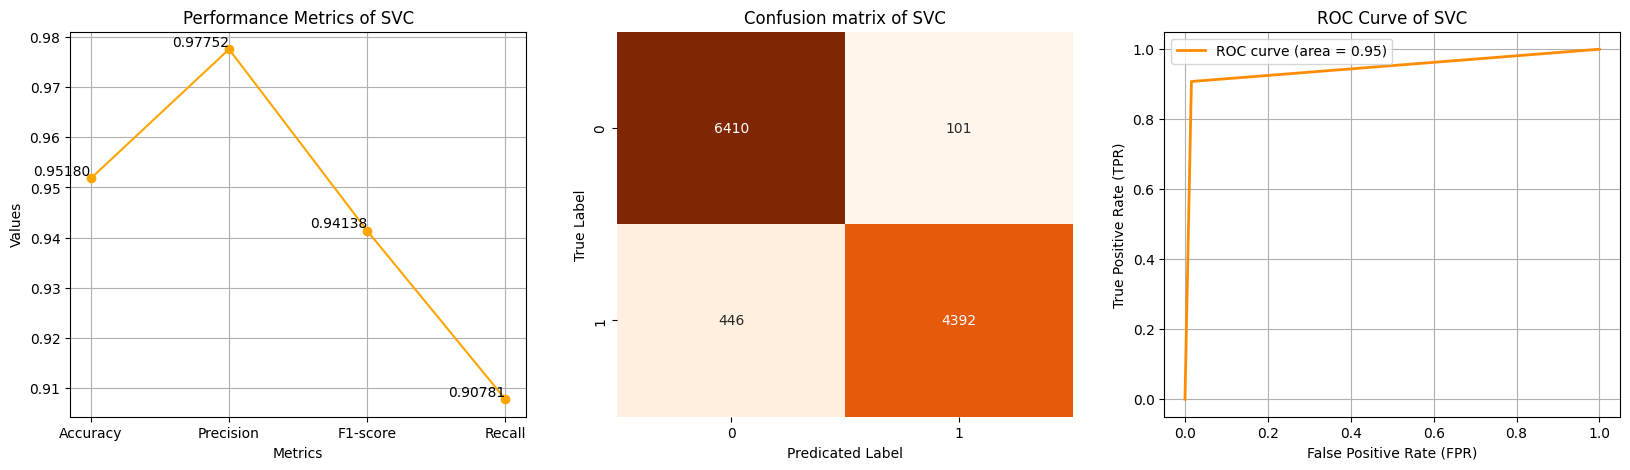

In [16]:
classifiers = {
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "RandomForestClassifier": RandomForestClassifier(),
    "MultinomialNB": MultinomialNB(),
    "KNeighborsClassifier": KNeighborsClassifier(),
    "SVC": SVC()
}

X = data['clean_tweet']
y = data['Toxicity']

model_CV = CountVectorizer(max_df=0.90, min_df=2,max_features=1000)
X = model_CV.fit_transform(X)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

for name, model in classifiers.items():
    model.fit(X, y)
    test_pred = model.predict(X_test)

    print(f'{name} Model:')
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, test_pred)
    precision = precision_score(y_test, test_pred)
    f1 = f1_score(y_test, test_pred)
    recall = recall_score(y_test, test_pred)
    
    #Visualize performance metrics
    metrics = ['Accuracy','Precision','F1-score','Recall']
    values = [accuracy,precision, f1, recall]
    plt.figure(figsize=(20,5))
    plt.subplot(1,3,1)
    plt.plot(metrics, values, marker='o', linestyle='-',color='orange')
    plt.title(f'Performance Metrics of {type(model).__name__}')
    plt.xlabel('Metrics')
    plt.ylabel('Values')
    plt.grid(True)

    # Adding labels to the data points
    for i in range(len(metrics)):
        plt.text(metrics[i], values[i], f'{values[i]:.5f}', ha='right', va='bottom')

    #Calculate Confusion Martix
    cm = confusion_matrix(y_test, test_pred)

    #Visualize Confusion Matrix
    plt.subplot(1,3,2)
    sns.heatmap(cm,annot=True, fmt="d",cmap='Oranges',cbar=False)
    plt.title(f'Confusion matrix of {name}')
    plt.xlabel('Predicated Label')
    plt.ylabel('True Label')

    #Calculate ROC-AUC curve
    fpr,tpr,thresholds = roc_curve(y_test, test_pred)
    roc_auc_curve = auc(fpr,tpr)

    #Visualize ROC-AUC curve
    plt.subplot(1,3,3)
    plt.plot(fpr,tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_curve)
    plt.title(f'ROC Curve of {type(model).__name__}')
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.legend()
    plt.grid(True)
    plt.show()

# TF-IDF Model Score 

DecisionTreeClassifier Model:


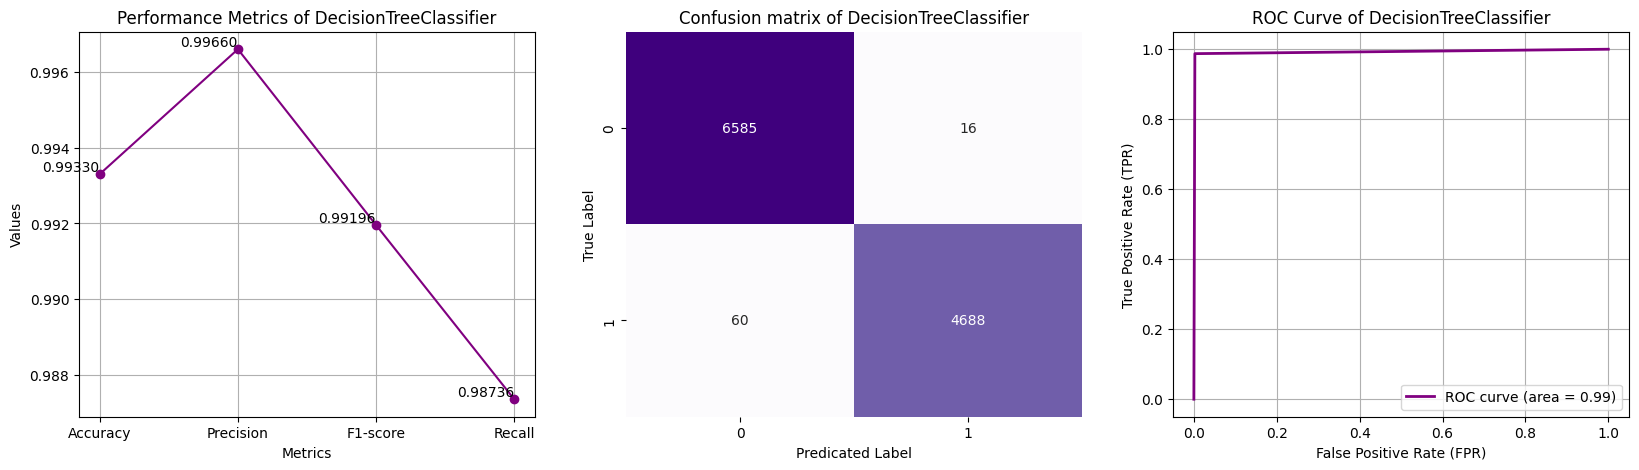

RandomForestClassifier Model:


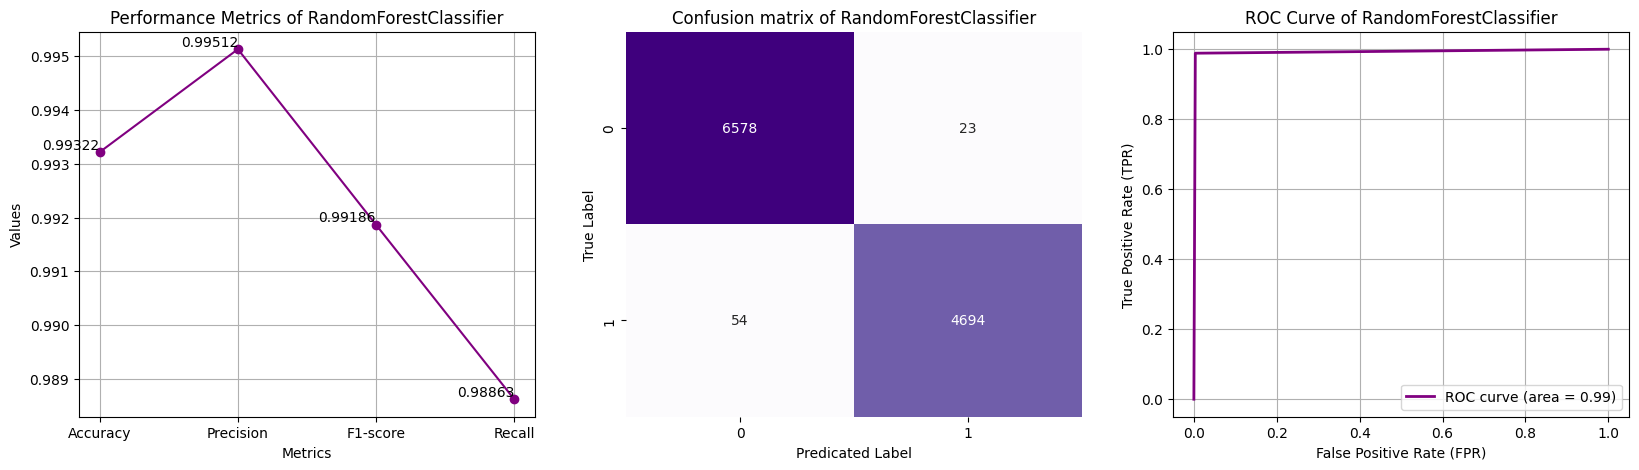

MultinomialNB Model:


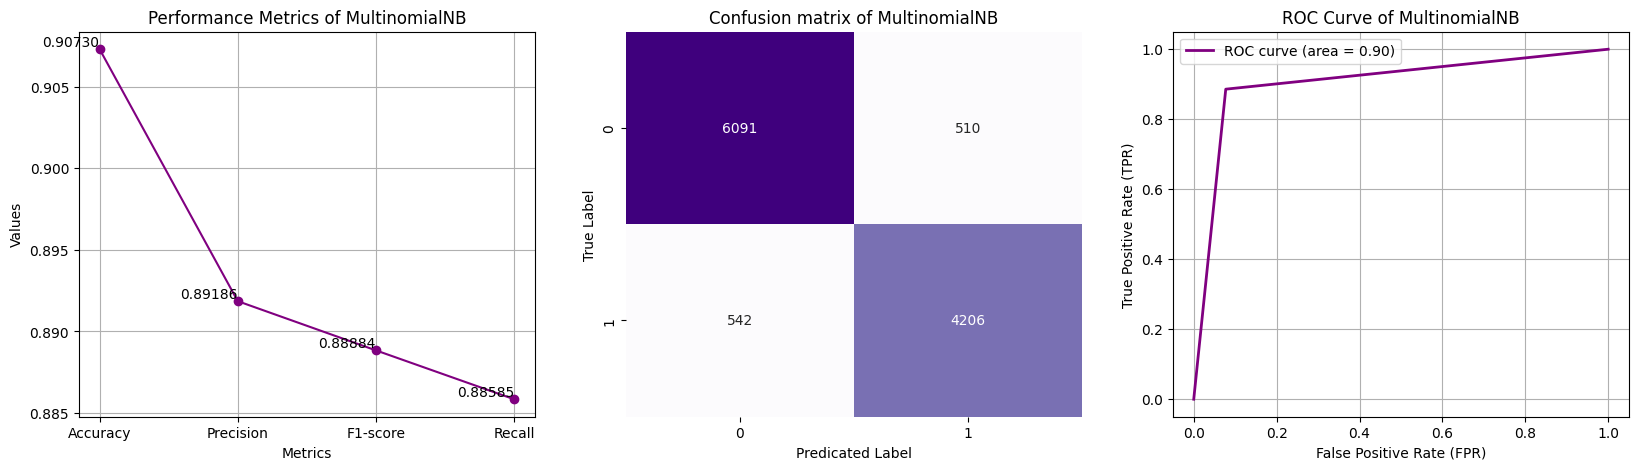

KNeighborsClassifier Model:


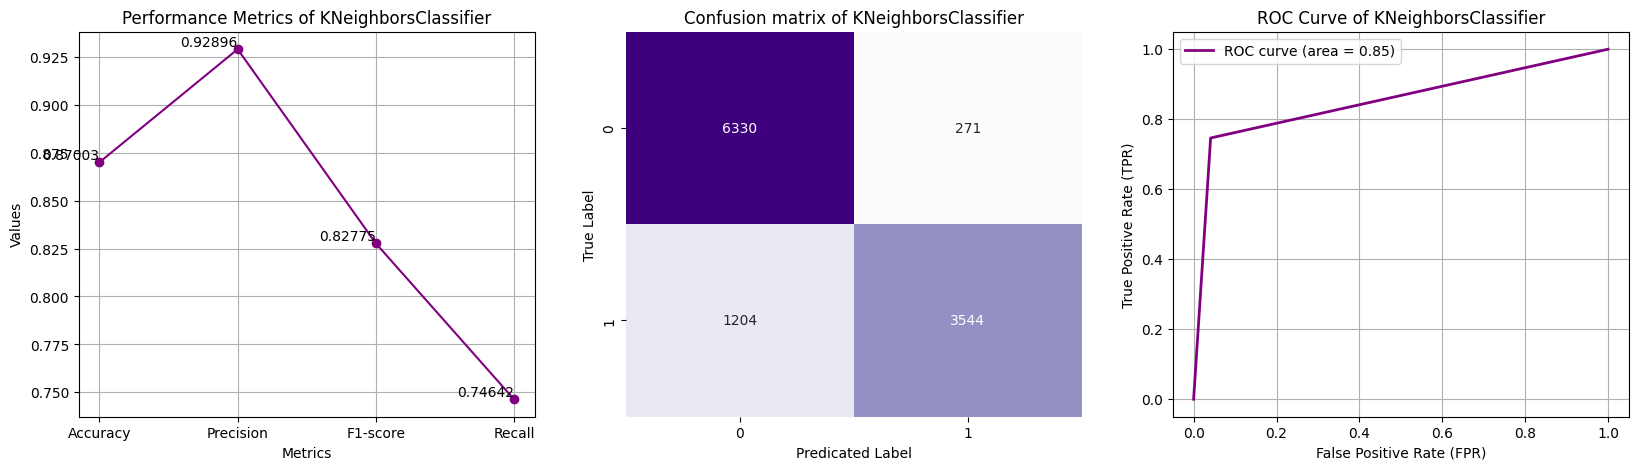

SVC Model:


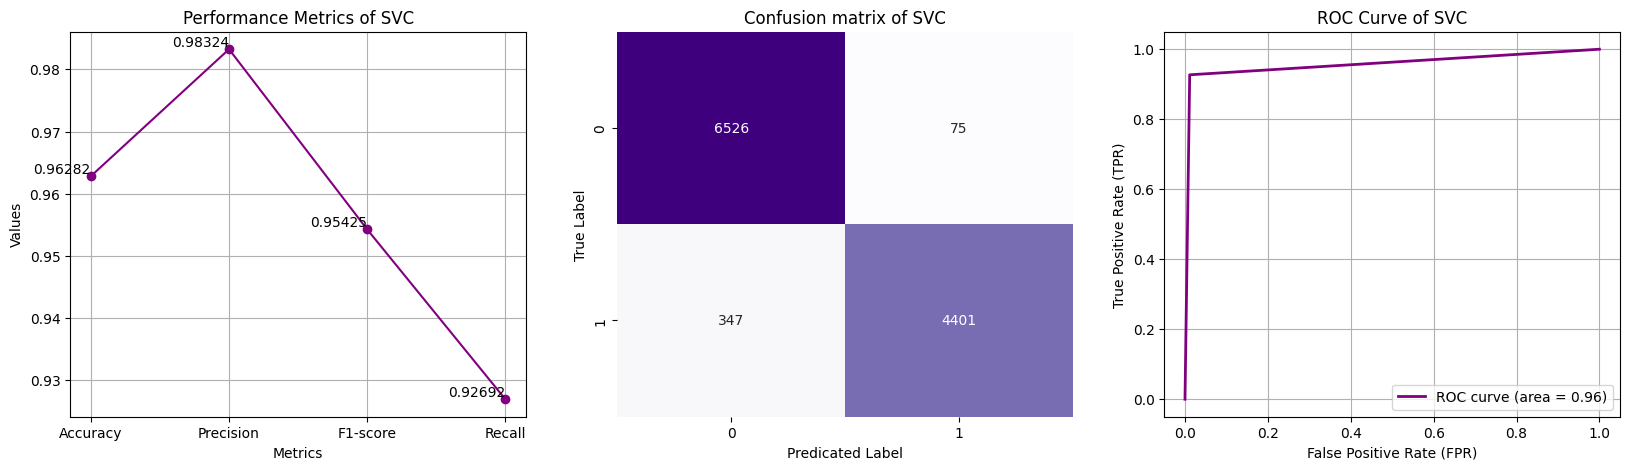

In [15]:
#Model score with Visualize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix,roc_curve,auc,roc_auc_score

classifiers = {
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "RandomForestClassifier": RandomForestClassifier(),
    "MultinomialNB": MultinomialNB(),
    "KNeighborsClassifier": KNeighborsClassifier(),
    "SVC": SVC()
}

X = data['clean_tweet']
y = data['Toxicity']

model_TF = TfidfVectorizer(max_df=0.90, min_df=2,max_features=1000)
X = model_TF.fit_transform(X)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

for name, model in classifiers.items():
    model.fit(X, y)
    test_pred = model.predict(X_test)

    print(f'{name} Model:')
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, test_pred)
    precision = precision_score(y_test, test_pred)
    f1 = f1_score(y_test, test_pred)
    recall = recall_score(y_test, test_pred)
    
    #Visualize performance metrics
    metrics = ['Accuracy','Precision','F1-score','Recall']
    values = [accuracy,precision, f1, recall]
    plt.figure(figsize=(20,5))
    plt.subplot(1,3,1)
    plt.plot(metrics, values, marker='o', linestyle='-',color='purple')
    plt.title(f'Performance Metrics of {type(model).__name__}')
    plt.xlabel('Metrics')
    plt.ylabel('Values')
    plt.grid(True)

    # Adding labels to the data points
    for i in range(len(metrics)):
        plt.text(metrics[i], values[i], f'{values[i]:.5f}', ha='right', va='bottom')

    #Calculate Confusion Martix
    cm = confusion_matrix(y_test, test_pred)

    #Visualize Confusion Matrix
    plt.subplot(1,3,2)
    sns.heatmap(cm,annot=True, fmt="d",cmap='Purples',cbar=False)
    plt.title(f'Confusion matrix of {name}')
    plt.xlabel('Predicated Label')
    plt.ylabel('True Label')

    #Calculate ROC-AUC curve
    fpr,tpr,thresholds = roc_curve(y_test, test_pred)
    roc_auc_curve = auc(fpr,tpr)

    #Visualize ROC-AUC curve
    plt.subplot(1,3,3)
    plt.plot(fpr,tpr, color='purple', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_curve)
    plt.title(f'ROC Curve of {type(model).__name__}')
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.legend()
    plt.grid(True)
    plt.show()